In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")





In [17]:
df = pd.read_csv("../data/simulated_cytokine_data.csv")
df.head()


,donor_id,group,sex,age,IFN_gamma,IP10,IL2,TNF_alpha,response_label
0,1,Vaccinated,M,33,387.166140,1033.078503,306.097114,147.741918,1
1,2,Vaccinated,F,38,283.567005,839.166202,177.353970,216.198113,1
2,3,Vaccinated,F,34,695.434816,1471.566793,46.950037,156.853659,1
3,4,Vaccinated,F,23,257.489783,1076.810524,129.353095,159.018106,0
4,5,Vaccinated,M,46,362.794217,1244.824296,60.336646,128.183267,0


In [18]:
df.info()
df['group'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   donor_id        150 non-null    int64  
 1   group           150 non-null    object 
 2   sex             150 non-null    object 
 3   age             150 non-null    int64  
 4   IFN_gamma       150 non-null    float64
 5   IP10            150 non-null    float64
 6   IL2             150 non-null    float64
 7   TNF_alpha       150 non-null    float64
 8   response_label  150 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.7+ KB


,count
group,
Vaccinated,100
Control,50


In [19]:
cytokines = [
    "IFN_gamma",
    "IL2",
    "TNF_alpha",
    "IP10"
]

df.groupby("group")[cytokines].describe().T


group               Control   Vaccinated
IFN_gamma count   50.000000   100.000000
          mean    97.046574   448.875679
          std     52.414210   117.616638
          min      0.000000   166.228586
          25%     57.943370   372.192785
          50%     97.853682   435.004907
          75%    134.738370   526.337389
          max    219.439161   767.023773
IL2       count   50.000000   100.000000
          mean    67.840980   211.931276
          std     40.512532    84.036346
          min      0.000000     0.000000
          25%     39.537042   166.457335
          50%     61.495449   209.592168
          75%     98.499553   266.287714
          max    140.191767   415.868784
TNF_alpha count   50.000000   100.000000
          mean   159.145463   151.378529
          std     60.132321    54.472572
          min     59.055353    39.547546
          25%    115.984260   113.109420
          50%    151.427973   153.776307
          75%    207.638970   186.786440
          max    297.318008   307.942924
IP10      count   50.000000   100.000000
          mean   255.294037   982.145559
          std    114.504150   280.401021
          min      0.000000   374.519709
          25%    182.244306   781.581296
          50%    271.364036   952.160046
          75%    329.054452  1144.235568
          max    559.952905  1719.720202

**Vaccinated individuals show higher median responses with overlapping distributions, consistent with real immunological data.**

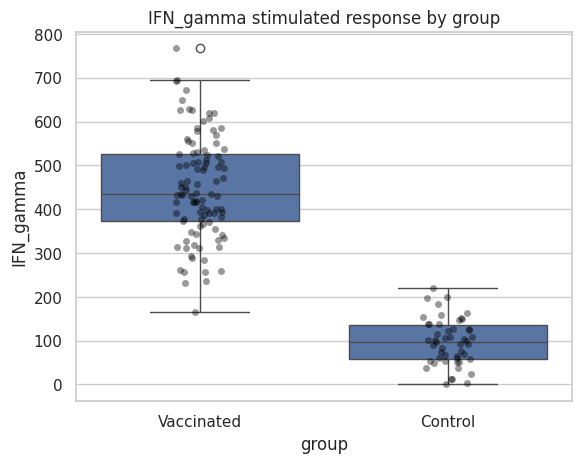

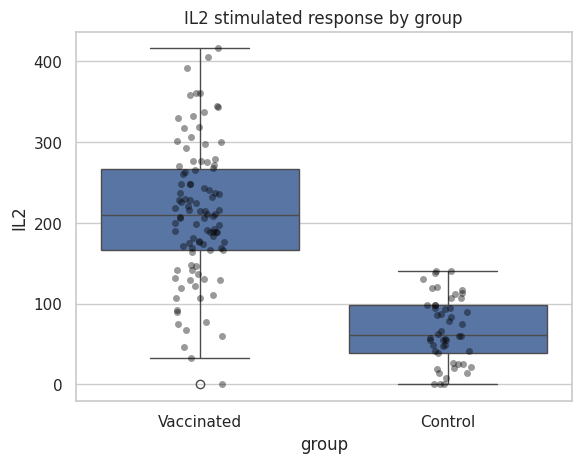

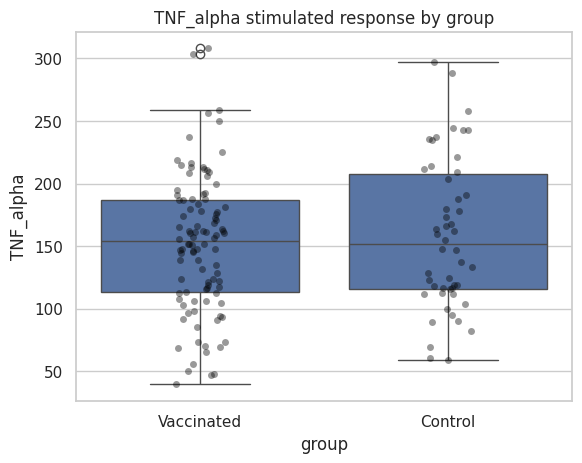

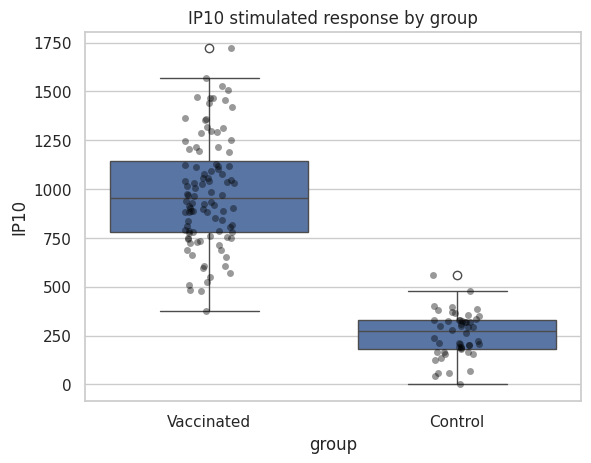

In [20]:
for marker in cytokines:
    plt.figure()
    sns.boxplot(data=df, x="group", y=marker)
    sns.stripplot(data=df, x="group", y=marker, color="black", alpha=0.4)
    plt.title(f"{marker} stimulated response by group")
    plt.show()


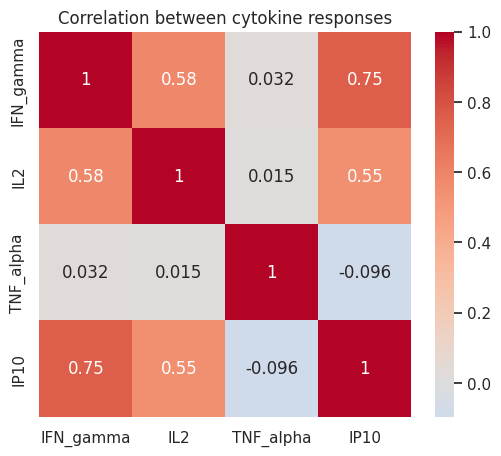

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[cytokines].corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation between cytokine responses")
plt.show()


**Moderate correlations reflect coordinated but non-redundant immune signaling.**

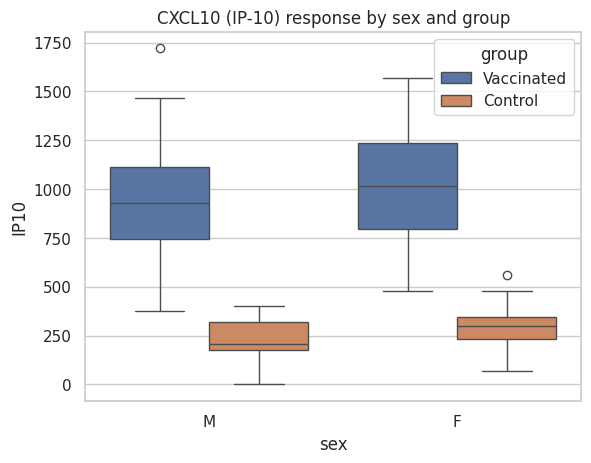

In [22]:
sns.boxplot(data=df, x="sex", y="IP10", hue="group")
plt.title("CXCL10 (IP-10) response by sex and group")
plt.show()


In [23]:
import os

os.makedirs("../results/figures", exist_ok=True)

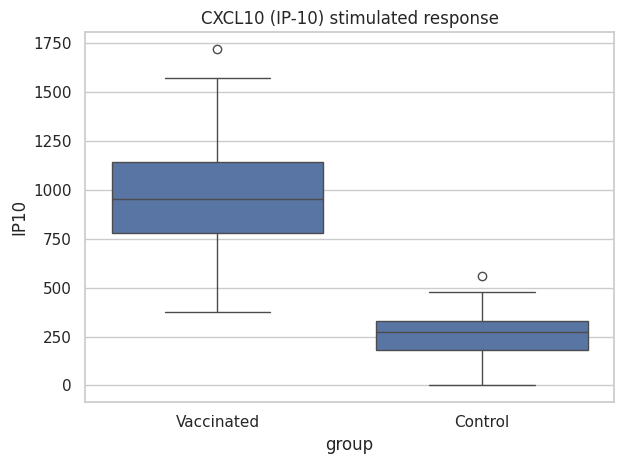

In [25]:
plt.figure()
sns.boxplot(data=df, x="group", y="IP10")
plt.title("CXCL10 (IP-10) stimulated response")
plt.tight_layout()
plt.savefig("../results/figures/ip10_by_group.png", dpi=300)
plt.show()



**Limitations**

This exploratory analysis is based on simulated data designed to reflect plausible biological variability. While useful for demonstrating analytical workflows, these results do not represent real experimental outcomes.